In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy.stats import spearmanr

# 한글폰트 사용을 위한 설정
import matplotlib.font_manager as fm 
import matplotlib

font_path = 'C:\\Windows\\Fonts\\gulim.ttc'
font = fm.FontProperties(fname=font_path).get_name()  
matplotlib.rc('font', family = font)

-------

In [ ]:
# 개요 시각화
x = np.arange(10)
years = [2015,2016,2017,2018,2019,2020,2021,2022,2023,2024]
values = [9.1,9.8,9.8,9.5,8.9,9.0,7.8,6.4,5.9,5.9]
employ_values = [41.2,41.7,42.1,42.7,43.5,42.2,44.2,46.6,46.5,46.1]

fig, ax1 = plt.subplots(figsize=(10,5))

# Bar: 왼쪽 y축
bars = ax1.bar(x, employ_values, width=0.5, color='skyblue',label='고용률(%)')
for bar in bars:
    bar.set_path_effects([
        pe.SimplePatchShadow(offset=(6, -6),
                             shadow_rgbFace='black',
                             alpha=0.7),
        pe.Normal()
    ])

ax1.bar_label(bars, labels=[f'{v:.1f}' for v in employ_values],
              padding=3, fontsize=10)
ax1.set_ylabel('값')
ax1.set_xticks(x)
ax1.set_xticklabels(years, rotation=45)
ax1.set_ylim(40, 50)
# Line: 오른쪽 y축
ax2 = ax1.twinx()
ax2.plot(x, values,
         marker='o', linestyle='-',
         linewidth=2, markersize=6,
         color='orange', label='실업률(%)')
ax2.set_ylabel('고용률 (%)')
ax2.set_ylim(0,14)
# 범례 합치기
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
legend = ax1.legend(lines+lines2, labels+labels2, loc='upper left', shadow=False)
for xi, yi in zip(x, values):
    ax2.text(xi, yi, f'{yi:.1f}',
             ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

-----

In [ ]:
# 통계량 분석

In [7]:
# 데이터 로드 (송이님이 오후에 보내주신 데이터 입니다.) 
youth_df = pd.read_csv('./data/youth_life (1).csv', encoding='cp949')
youth_df.head()

,Unnamed: 0,성별,연령별,지역별,학력,운동,취업 준비 도움 주체 - 공공 기관,취업 준비 도움 정도 - 공공 기관,취업자여부,고용형태,고용기간,사업체규모,재직기간(범위),가구 연간소득 - 총 소득(만원),수혜여부(만원),부채(만원),재산(만원)
0,0,1,1,11,4,1,2,2,1,1,2,2,1,500,2,0,25000
1,1,1,1,11,4,1,2,2,1,1,2,2,2,3500,2,15000,120000
2,2,1,1,11,4,1,2,2,1,1,2,6,2,10000,2,50,90000
3,3,1,1,11,4,1,2,2,1,3,2,2,1,3600,2,0,60000
4,11,1,1,11,4,1,2,2,1,2,1,4,1,1500,2,30,800


In [8]:
# 결측치 확인
youth_df.isnull().sum()

Unnamed: 0             0
성별                     0
연령별                    0
지역별                    0
학력                     0
운동                     0
취업 준비 도움 주체 - 공공 기관    0
취업 준비 도움 정도 - 공공 기관    0
취업자여부                  0
고용형태                   0
고용기간                   0
사업체규모                  0
재직기간(범위)               0
가구 연간소득 - 총 소득(만원)     0
수혜여부(만원)               0
부채(만원)                 0
재산(만원)                 0
dtype: int64

In [9]:
# 이상치 확인
youth_df.describe()

,Unnamed: 0,성별,연령별,지역별,학력,운동,취업 준비 도움 주체 - 공공 기관,취업 준비 도움 정도 - 공공 기관,취업자여부,고용형태,고용기간,사업체규모,재직기간(범위),가구 연간소득 - 총 소득(만원),수혜여부(만원),부채(만원),재산(만원)
count,9285.000000,9285.000000,9285.000000,9285.000000,9285.000000,9285.000000,9285.000000,9285.000000,9285.000000,9285.000000,9285.000000,9285.000000,9285.000000,9285.000000,9285.000000,9285.000000,9.285000e+03
mean,7942.124394,1.511901,2.077975,27.533764,5.534195,2.860851,1.859882,2.213139,1.030156,1.298331,1.759720,4.423156,2.065590,5509.453958,1.972859,3400.467744,2.466155e+04
std,4163.267791,0.499885,0.777036,8.385662,0.830431,1.246806,0.347129,0.626088,0.171026,0.582824,0.427276,1.943804,0.813968,4255.157789,0.162502,7320.467110,4.731005e+04
min,0.000000,1.000000,1.000000,11.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000e+00
25%,4514.000000,1.000000,1.000000,23.000000,5.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,3.000000,1.000000,3275.000000,2.000000,0.000000,3.000000e+03
50%,7623.000000,2.000000,2.000000,31.000000,6.000000,3.000000,2.000000,2.000000,1.000000,1.000000,2.000000,4.000000,2.000000,4800.000000,2.000000,0.000000,1.300000e+04
75%,11622.000000,2.000000,3.000000,34.000000,6.000000,4.000000,2.000000,2.000000,1.000000,1.000000,2.000000,5.000000,3.000000,7100.000000,2.000000,4000.000000,3.200000e+04
max,15096.000000,2.000000,3.000000,39.000000,8.000000,5.000000,2.000000,5.000000,2.000000,3.000000,2.000000,9.000000,3.000000,210000.000000,2.000000,200000.000000,3.100000e+06


In [10]:
# 순수익 컬럼 생산 및 컬럼 삭제 
youth_df['순수익'] = youth_df['재산(만원)'] - youth_df['부채(만원)']
youth_df.drop(labels=['Unnamed: 0'], axis=1, inplace=True)
youth_df

,성별,연령별,지역별,학력,운동,취업 준비 도움 주체 - 공공 기관,취업 준비 도움 정도 - 공공 기관,취업자여부,고용형태,고용기간,사업체규모,재직기간(범위),가구 연간소득 - 총 소득(만원),수혜여부(만원),부채(만원),재산(만원),순수익
0,1,1,11,4,1,2,2,1,1,2,2,1,500,2,0,25000,25000
1,1,1,11,4,1,2,2,1,1,2,2,2,3500,2,15000,120000,105000
2,1,1,11,4,1,2,2,1,1,2,6,2,10000,2,50,90000,89950
3,1,1,11,4,1,2,2,1,3,2,2,1,3600,2,0,60000,60000
4,1,1,11,4,1,2,2,1,2,1,4,1,1500,2,30,800,770
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9280,2,3,39,6,4,2,2,2,1,1,3,3,3840,2,1000,1500,500
9281,2,3,39,6,4,2,2,1,1,2,3,3,4000,2,200,10000,9800
9282,2,3,39,6,5,2,2,1,1,2,5,3,7500,2,300,3500,3200
9283,2,3,39,6,5,2,2,1,1,2,3,3,12000,2,25000,20000,-5000


In [11]:
# 전체 칼럼에 대한 상관계수 생성(스피어만)
corr_matrix = youth_df.corr(method='spearman', numeric_only=True)   # 스피어만 상관계수 따름. 
corr_matrix

# print(df.corr(method='spearman'))                # 스피어만 

,성별,연령별,지역별,학력,운동,취업 준비 도움 주체 - 공공 기관,취업 준비 도움 정도 - 공공 기관,취업자여부,고용형태,고용기간,사업체규모,재직기간(범위),가구 연간소득 - 총 소득(만원),수혜여부(만원),부채(만원),재산(만원),순수익
성별,1.000000,-0.083567,-0.012808,0.098614,-0.138609,-0.022357,0.028548,0.024779,0.014698,-0.030232,-0.092065,-0.037359,-0.000462,-0.030499,0.005889,0.029452,0.028714
연령별,-0.083567,1.000000,-0.031293,0.066475,0.018157,-0.045543,0.038133,0.071054,-0.368021,0.167620,0.234025,0.463837,0.096422,0.068458,0.128838,0.050475,-0.003799
지역별,-0.012808,-0.031293,1.000000,-0.082407,-0.001073,-0.016939,0.028957,0.001227,-0.014109,-0.002165,-0.016666,-0.015467,-0.003651,-0.027917,0.004386,-0.094826,-0.084052
학력,0.098614,0.066475,-0.082407,1.000000,0.106659,-0.044307,0.032716,0.031550,-0.013379,-0.018820,0.156502,-0.012685,0.106110,-0.007467,0.050090,0.144854,0.125087
운동,-0.138609,0.018157,-0.001073,0.106659,1.000000,-0.017757,0.011265,-0.007543,-0.044128,0.010829,0.078567,0.058422,0.032064,-0.018222,-0.029525,0.031050,0.034469
취업 준비 도움 주체 - 공공 기관,-0.022357,-0.045543,-0.016939,-0.044307,-0.017757,1.000000,-0.889462,0.002237,0.022343,0.030062,-0.047413,0.061517,0.019834,0.196086,-0.030290,0.018950,0.027057
취업 준비 도움 정도 - 공공 기관,0.028548,0.038133,0.028957,0.032716,0.011265,-0.889462,1.000000,-0.002542,-0.019971,-0.025557,0.036357,-0.051716,-0.016563,-0.184070,0.026736,-0.016964,-0.023428
취업자여부,0.024779,0.071054,0.001227,0.031550,-0.007543,0.002237,-0.002542,1.000000,-0.050245,-0.026121,0.044791,0.046478,0.011279,0.010074,0.049636,-0.015534,-0.039179
고용형태,0.014698,-0.368021,-0.014109,-0.013379,-0.044128,0.022343,-0.019971,-0.050245,1.000000,-0.310518,-0.386148,-0.402921,-0.116083,-0.051115,-0.031650,-0.035139,-0.016271
고용기간,-0.030232,0.167620,-0.002165,-0.018820,0.010829,0.030062,-0.025557,-0.026121,-0.310518,1.000000,0.088719,0.259874,0.075873,0.050339,0.013495,0.045099,0.041134


,성별,연령별,지역별,학력,가구 연간소득 - 총 소득(만원),취업 준비 도움 주체 - 공공 기관,취업자여부
성별,1.000000,-0.428571,0.035714,0.535714,-0.107143,-0.107143,0.214286
연령별,-0.428571,1.000000,-0.107143,0.250000,0.607143,-0.250000,0.500000
지역별,0.035714,-0.107143,1.000000,-0.571429,-0.571429,0.464286,-0.321429
학력,0.535714,0.250000,-0.571429,1.000000,0.714286,-0.357143,0.392857
가구 연간소득 - 총 소득(만원),-0.107143,0.607143,-0.571429,0.714286,1.000000,0.000000,0.250000
취업 준비 도움 주체 - 공공 기관,-0.107143,-0.250000,0.464286,-0.357143,0.000000,1.000000,-0.464286
취업자여부,0.214286,0.500000,-0.321429,0.392857,0.250000,-0.464286,1.000000


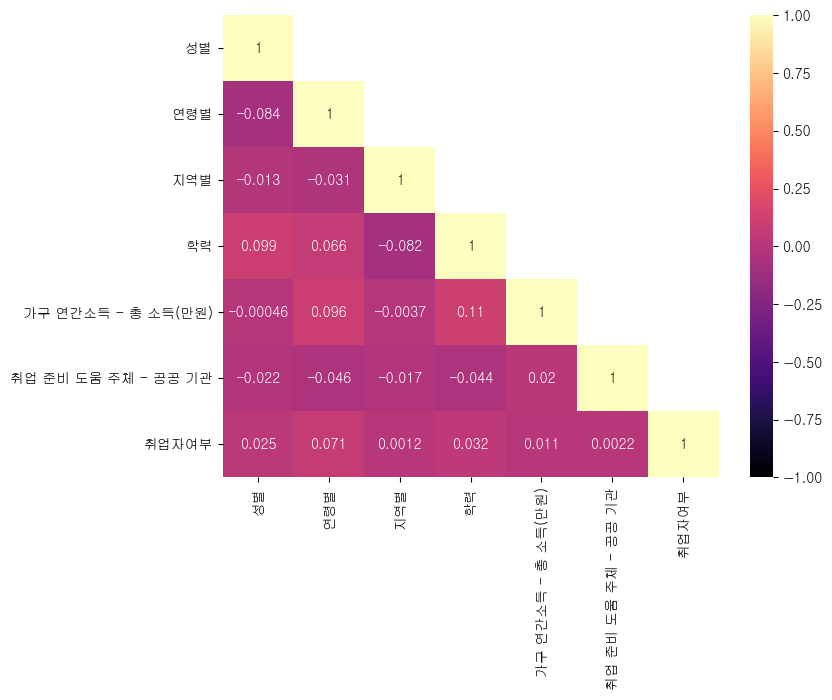

In [37]:
# 히트맵 = 전체 칼럼 대상
# sns.heatmap(corr_matrix, annot=True)   # annot = 수치값 반환
# plt.figure(figsize=(100, 20))
# plt.show() 

corr_matrix_2 = youth_df[['성별','연령별','지역별','학력','가구 연간소득 - 총 소득(만원)','취업 준비 도움 주체 - 공공 기관', '취업자여부']].corr(method='spearman', numeric_only=True)   # 스피어만 상관계수 따름. numeric_only : 
display(corr_matrix_2.corr(method='spearman', numeric_only=True))

mask = np.triu(np.ones_like(corr_matrix_2, dtype=bool), k=1)

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix_2, mask=mask, annot=True, cmap='magma', vmax=1, vmin=-1)
plt.show()

In [13]:
# 취업률과 공공기관 참여 여부에 대한 상관분석
youth_df[["취업자여부", "취업 준비 도움 주체 - 공공 기관"]].corr()

,취업자여부,취업 준비 도움 주체 - 공공 기관
취업자여부,1.000000,0.002237
취업 준비 도움 주체 - 공공 기관,0.002237,1.000000


In [14]:
from scipy import stats

stats.mstats.pointbiserialr(youth_df['취업자여부'], youth_df['재직기간(범위)']).correlation

c:\Users\Playdata\anaconda3\envs\ml_env\Lib\site-packages\numpy\ma\core.py:5415: RuntimeWarning: Mean of empty slice.
  result = super().mean(axis=axis, dtype=dtype, **kwargs)[()]
c:\Users\Playdata\anaconda3\envs\ml_env\Lib\site-packages\numpy\_core\_methods.py:136: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


np.float64(nan)

In [ ]:
from scipy.stats import pointbiserialr

# # 점계열 상관계수 계산
# correlation, p_value = pointbiserialr(youth_df['취업 준비 도움 정도 - 공공 기관'], youth_df['재직기간(범위)'])

# print("점계열 상관계수:", correlation)
# print("p-value:", p_value)

# # '취업지원정책 참여와 재직기간은 상관이 없다'는 귀무가설을 기각할만큼 p값이 작으나 상관계수 값이 매우 작아 유의미한 결과 지표를 판단하진 않음. 

점계열 상관계수: -0.05258672700391252
p-value: 3.977850573937734e-07


In [17]:
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from scipy.stats import kendalltau

In [18]:
pearsonr(youth_df['취업 준비 도움 정도 - 공공 기관'], youth_df['취업자여부'])

PearsonRResult(statistic=np.float64(-0.005712722930090452), pvalue=np.float64(0.5820443894818739))

In [19]:
spearmanr(youth_df['취업 준비 도움 정도 - 공공 기관'], youth_df['취업자여부'])

SignificanceResult(statistic=np.float64(-0.0025423700042555906), pvalue=np.float64(0.8064975512088922))

In [20]:
kendalltau(youth_df['취업 준비 도움 정도 - 공공 기관'], youth_df['취업자여부'])

SignificanceResult(statistic=np.float64(-0.0024918541500352606), pvalue=np.float64(0.8064825342420824))

In [49]:
kendalltau(youth_df['취업 준비 도움 주체 - 공공 기관'], youth_df['고용기간'])

SignificanceResult(statistic=np.float64(0.030062190986452946), pvalue=np.float64(0.0037723304863857515))

In [50]:
kendalltau(youth_df['취업 준비 도움 주체 - 공공 기관'], youth_df['고용형태'])

SignificanceResult(statistic=np.float64(0.02184294786059582), pvalue=np.float64(0.03133397382174092))

In [21]:
from scipy.stats import chi2_contingency

# 교차표 생성
contingency_table = pd.crosstab(youth_df['취업 준비 도움 주체 - 공공 기관'], youth_df['취업자여부'])

# 카이제곱 독립성 검정: 취업률과 취업지원제도 참여 상관분석
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi2 Statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)


Chi2 Statistic: 0.016429246086206405
P-value: 0.8980092014416176
Degrees of Freedom: 1
Expected Frequencies:
[[1261.76682822   39.23317178]
 [7743.23317178  240.76682822]]


In [22]:
# 파이계수 구하기
# 전체 표본 수 n
n = expected.sum()

# 파이 계수 계산
phi = np.sqrt(chi2 / n)
print(f"파이 계수 (Φ): {phi:.6f}")

# Cramér's V = 0.001330 무의미

파이 계수 (Φ): 0.001330


In [ ]:
from scipy.stats import chi2_contingency

# 교차표 생성
contingency_table = pd.crosstab(youth_df['취업 준비 도움 주체 - 공공 기관'], youth_df['취업자여부'])

# 카이제곱 독립성 검정: 취업 여부와 취업지원제도 만족도 상관분석
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi2 Statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)


Chi2 Statistic: 4.730034972429888
P-value: 0.31613551049577227
Degrees of Freedom: 4
Expected Frequencies:
[[4.07334410e+01 1.26655897e+00]
 [7.83245880e+03 2.43541195e+02]
 [4.44188476e+02 1.38115240e+01]
 [5.46991922e+02 1.70080775e+01]
 [1.40627356e+02 4.37264405e+00]]


In [55]:
########################################################################################################
# 교차표 생성
contingency_table = pd.crosstab(youth_df['취업 준비 도움 정도 - 공공 기관'], youth_df['재직기간(범위)'])

# 카이제곱 독립성 검정: 취업지원제도 만족도와 고용기간
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi2 Statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)
###########################################################################################################

Chi2 Statistic: 45.33969900295852
P-value: 3.172700858573385e-07
Degrees of Freedom: 8
Expected Frequencies:
[[  12.62487884   13.99547658   15.37964459]
 [2427.58384491 2691.13021002 2957.28594507]
 [ 137.67129779  152.6173398   167.71136241]
 [ 169.53408724  187.93925687  206.5266559 ]
 [  43.58589122   48.31771675   53.09639203]]


In [ ]:
# 교차표 생성
contingency_table = pd.crosstab(youth_df['취업 준비 도움 주체 - 공공 기관'], youth_df['고용기간'])

chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi2 Statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)

Chi2 Statistic: 8.189700050509838
P-value: 0.0042128888535302375
Degrees of Freedom: 1
Expected Frequencies:
[[ 312.60430802  988.39569198]
 [1918.39569198 6065.60430802]]


In [45]:
# 교차표 생성
contingency_table = pd.crosstab(youth_df['취업 준비 도움 주체 - 공공 기관'], youth_df['사업체규모'])

# 카이제곱 독립성 검정: 취업지원제도 만족도와 고용기간
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi2 Statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)

Chi2 Statistic: 39.072714182773936
P-value: 4.765020926308139e-06
Degrees of Freedom: 8
Expected Frequencies:
[[  14.01184707  206.67474421  232.87689822  300.55411955  235.25891222
   138.01669359   49.88217555   40.77447496   82.95013463]
 [  85.98815293 1268.32525579 1429.12310178 1844.44588045 1443.74108778
   846.98330641  306.11782445  250.22552504  509.04986537]]


-----

In [29]:
employment_df = pd.read_csv('./data/employment_date_youth.csv', encoding='cp949')
employment_df.head()

,Unnamed: 0,연도,지역,학력,취업수
0,0,2020,강원,초졸,45
1,1,2020,강원,중졸,163
2,2,2020,강원,고졸,4146
3,3,2020,강원,전문대졸,2642
4,4,2020,강원,대졸,3466


In [30]:
employment_df.drop(labels=['Unnamed: 0'], axis=1, inplace=True)

In [31]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

encoder.fit(employment_df['지역'])   
employment_df['지역'] = encoder.transform(employment_df['지역'])
employment_df

encoder.fit(employment_df['학력'])  
employment_df['학력'] = encoder.transform(employment_df['학력'])
employment_df

,연도,지역,학력,취업수
0,2020,0,5,45
1,2020,0,4,163
2,2020,0,0,4146
3,2020,0,3,2642
4,2020,0,1,3466
...,...,...,...,...
505,2024,16,4,170
506,2024,16,0,0
507,2024,16,3,0
508,2024,16,1,0


In [32]:
# 전체 칼럼에 대한 상관계수 생성(스피어만)
corr_matrix = employment_df.corr(method='spearman', numeric_only=True)   # 스피어만 상관계수 따름. 
corr_matrix

,연도,지역,학력,취업수
연도,1.000000,0.000000,0.000000,-0.384042
지역,0.000000,1.000000,0.000000,-0.110318
학력,0.000000,0.000000,1.000000,-0.073357
취업수,-0.384042,-0.110318,-0.073357,1.000000


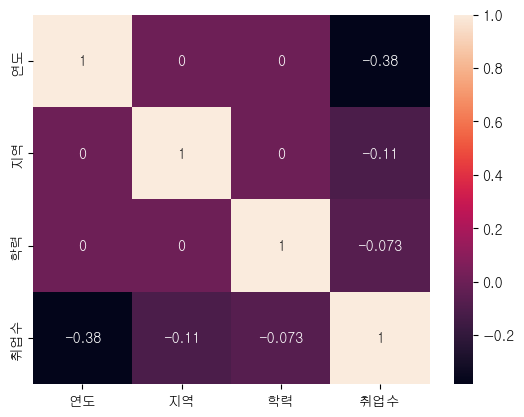

<Figure size 10000x2000 with 0 Axes>

In [33]:
# 히트맵 = 전체 칼럼 대상
sns.heatmap(corr_matrix, annot=True)   # annot = 수치값 반환
plt.figure(figsize=(100, 20))
plt.show() 


-------

In [ ]:
# 시각화
youth_df.to_csv('파일이름.csv', index=False, encoding='utf-8-sig')

columns = [
    '취업 준비 도움 주체 - 공공 기관',
    '취업 준비 도움 정도 - 공공 기관',
    '취업자여부',
    '고용형태',
    '고용기간',
    '재직기간(범위)'
]

df_selected = youth_df[columns]
df_selected

df_participated = df_selected[df_selected['취업 준비 도움 주체 - 공공 기관'] == 1]
df_participated

# 공공기관 취업 준비 도움 정도 (취업지원제도 참여자 대상)

# 1. 도움 정도별 응답 수 집계
help_counts = df_participated['취업 준비 도움 정도 - 공공 기관'].value_counts().sort_index()

# 2. x축 라벨 설정
labels = {
    1: '1 : 전혀 도움이 안되었다.',
    2: '2 : 별로 도움이 안되었다.',
    3: '3 : 보통이다.',
    4: '4 : 약간 도움이 되었다.',
    5: '5 : 매우 도움이 되었다.'
}
x_labels = [labels[i] for i in help_counts.index]

# 3. 그래프 그리기
plt.figure(figsize=(10, 6))
sns.barplot(x=x_labels, y=help_counts.values, palette='coolwarm')
plt.title('공공기관 취업 준비 도움 정도 (취업지원제도 참여자 중)', fontsize=15)
plt.xlabel('도움 정도', fontsize=12)
plt.ylabel('응답자 수', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [ ]:
df_employed = df_selected[df_selected['취업자여부'] == 1]
df_employed

# 고용기간별 취업지원제도 참여 여부에 따른 응답자 수(취업자 중)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 참여여부, 고용기간명 매핑 (이미 하셨다면 생략 가능)
df_employed['참여여부'] = df_employed['취업 준비 도움 주체 - 공공 기관'].map({1: '참여자', 2: '미참여자'})
df_employed['고용기간명'] = df_employed['고용기간'].map({1: '계약직', 2: '정규직'})

# 2. 그룹별 응답자 수 계산
grouped = df_employed.groupby(['고용기간명', '참여여부']).size().reset_index(name='응답자수')

# 3. 고용기간명별 총 응답자 수 계산 (비율 계산용)
total_per_type = grouped.groupby('고용기간명')['응답자수'].transform('sum')

# 4. 비율 컬럼 추가
grouped['비율'] = grouped['응답자수'] / total_per_type * 100
ax = sns.barplot(data=grouped, x='고용기간명', y='비율', hue='참여여부', palette='Set2')
ax.bar_label(ax.containers[0], fmt='%.1f%%')  # 참여자 막대
ax.bar_label(ax.containers[1], fmt='%.1f%%') 
ax.set_yticks(np.arange(0, 105, 5))
# 5. 시각화 (비율 %)
# plt.figure(figsize=(8,6))
# sns.countplot(data=grouped, x='고용기간명', y='비율', hue='참여여부',
#             hue_order=['참여자', '미참여자'], palette='Set2')

# plt.title('고용기간별 취업지원제도 참여 여부에 따른 응답자 비율 (%)', fontsize=14)
# plt.xlabel('고용기간', fontsize=12)
# plt.ylabel('응답자 비율 (%)', fontsize=12)
# plt.yticks(np.arange(0, 105, 5))
# plt.legend(title='참여여부')
# plt.grid(axis='y', linestyle='--', alpha=0.5)

# plt.tight_layout()
# plt.show()

In [ ]:
# 1. 참여자/미참여자 라벨 매핑
df_employed['참여여부'] = df_employed['취업 준비 도움 주체 - 공공 기관'].map({1: '참여자', 2: '미참여자'})
df_employed['고용기간명'] = df_employed['고용기간'].map({1: '계약직', 2: '정규직'})

# 2. 그룹별 응답자 수 계산
grouped = df_employed.groupby(['참여여부', '고용기간명']).size().reset_index(name='응답자수')

# 3. 전체 참여자 / 미참여자 수 계산 후 비율 컬럼 추가
total_by_group = grouped.groupby('참여여부')['응답자수'].transform('sum')
grouped['비율'] = grouped['응답자수'] / total_by_group

# 4. 시각화
plt.figure(figsize=(8,6))
sns.barplot(data=grouped, x='참여여부', y='비율', hue='고용기간명', palette='Set2')

plt.title('참여 여부별 고용기간 구성 비율 (취업자 중)', fontsize=14)
plt.ylabel('비율', fontsize=12)
plt.xlabel('취업지원제도 참여여부', fontsize=12)
plt.legend(title='고용기간')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [ ]:
# 재직기간별 취업지원제도 참여 여부에 따른 응답자 수(취업자 중)

# 1. 참여여부 라벨 추가
df_employed['참여여부'] = df_employed['취업 준비 도움 주체 - 공공 기관'].map({1: '참여자', 2: '미참여자'})

# 2. 재직기간을 문자열로 변환 (시각화에 적절하게)
df_employed['재직기간범위'] = df_employed['재직기간(범위)'].map({
    1: '1년', 
    2: '2년', 
    3: '3년'
})

# 3. 그룹화하여 응답자 수 계산
grouped = df_employed.groupby(['재직기간범위', '참여여부']).size().reset_index(name='응답자수')

# 4. 시각화
plt.figure(figsize=(8,6))
sns.barplot(
    data=grouped, 
    x='재직기간범위', 
    y='응답자수', 
    hue='참여여부', 
    hue_order=['참여자', '미참여자'], 
    palette='Set2'
)

plt.title('재직기간별 취업지원제도 참여 여부에 따른 응답자 수(취업자 중)', fontsize=14)
plt.xlabel('재직기간', fontsize=12)
plt.ylabel('응답자 수', fontsize=12)
plt.legend(title='참여여부')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [ ]:
# 고용형태별 취업지원제도 참여 여부에 따른 응답자 수(취업자 중)

# 1. 참여 여부 라벨 추가
df_employed['참여여부'] = df_employed['취업 준비 도움 주체 - 공공 기관'].map({1: '참여자', 2: '미참여자'})

# 2. 고용형태 라벨링
df_employed['고용형태명'] = df_employed['고용형태'].map({
    1: '상용근로자',
    2: '임시근로자',
    3: '일용근로자'
})

# 3. 그룹화하여 응답자 수 계산
grouped = df_employed.groupby(['고용형태명', '참여여부']).size().reset_index(name='응답자수')

# 4. 시각화
plt.figure(figsize=(8,6))
sns.barplot(
    data=grouped,
    x='고용형태명',
    y='응답자수',
    hue='참여여부',
    hue_order=['참여자', '미참여자'],
    palette='Set2'
)

plt.title('고용형태별 취업지원제도 참여 여부에 따른 응답자 수(취업자 중)', fontsize=14)
plt.xlabel('고용형태', fontsize=12)
plt.ylabel('응답자 수', fontsize=12)
plt.legend(title='참여여부')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()